In [1]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone1_Rename_later
['.git', '.gitignore', '.ipynb_checkpoints', '769175_1325857_bundle_archive.zip', 'Data Analysis.ipynb', 'Initial EDA.ipynb', 'modern-renewable-energy-consumption.csv', 'README.md', 'Research Proposal.ipynb']


<IPython.core.display.Javascript object>

In [2]:
energy = pd.read_csv("modern-renewable-energy-consumption.csv")

<IPython.core.display.Javascript object>

From the website: https://www.statista.com/statistics/263455/primary-energy-consumption-of-selected-countries/
We see that the top three energy consuming countries in 2019 (most to least) are China, the United States, and India.

In [14]:
#To clean up the data, I have filtered out the table to only include the top three energy consuming countries.
top = ["United States", "China", "India"]
top_energy = energy[energy["Entity"].isin(top)]
us = energy[energy["Entity"] == "United States"]
china = energy[energy["Entity"] == "China"]
india = energy[energy["Entity"] == "India"]

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
824,China,CHN,1965,22.097000,0.0,0.0,0.0
825,China,CHN,1966,22.485907,0.0,0.0,0.0
826,China,CHN,1967,19.383488,0.0,0.0,0.0
827,China,CHN,1968,22.870395,0.0,0.0,0.0
828,China,CHN,1969,23.259302,0.0,0.0,0.0


<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001234CB44648>,
      dtype=object)

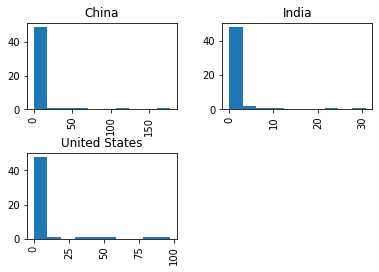

<IPython.core.display.Javascript object>

In [18]:
top_energy["Solar (terawatt-hours)"].hist(by=top_energy["Entity"])

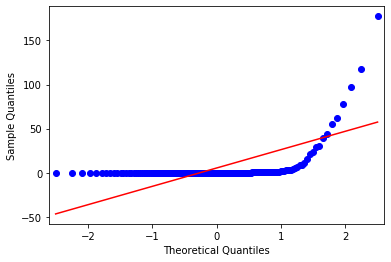

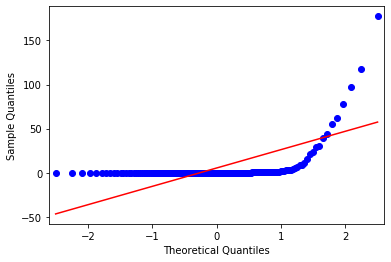

<IPython.core.display.Javascript object>

In [25]:
#Trying to plot qqplot for the top three countries.
#Why are there only two qqplots
qqplot(top_energy["Solar (terawatt-hours)"], line="s")

In [33]:
# From the histograms above I noticed the data is not normalized.
# Additionally, each of the countries are independent of eachother.
# Therefore, to check if there is a siginificant difference between the three I used a Kruskal Wallice test.
t, p = stats.kruskal(
    top_energy.loc[top_energy["Entity"] == "United States", ["Solar (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "China", ["Solar (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "India", ["Solar (terawatt-hours)"]],
)
if p < 0.05:
    print("There is a significant difference. Reject the null hypothesis")
else:
    print("There is no significant difference. Cannot reject the null hypothesis")
print(p)

There is a significant difference. Reject the null hypothesis
0.006402094683951255


<IPython.core.display.Javascript object>

In [34]:
x1 = us["Solar (terawatt-hours)"]
x2 = china["Solar (terawatt-hours)"]
x3 = india["Solar (terawatt-hours)"]

<IPython.core.display.Javascript object>

In [36]:
# Check confidence interval between the US and China
signal = x1.mean() - x2.mean()
noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise
(ci_lo, ci_hi)

(-11.240810952890772, 7.76833150900475)

<IPython.core.display.Javascript object>

In [37]:
# Check confidence interval between the US and India
signal = x1.mean() - x3.mean()
noise = np.sqrt(x1.var() / x1.size + x3.var() / x3.size)

ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise
(ci_lo, ci_hi)

(-0.36754084725138636, 10.165627660954591)

<IPython.core.display.Javascript object>

In [38]:
# Check confidence interval between the China and India
signal = x2.mean() - x3.mean()
noise = np.sqrt(x2.var() / x2.size + x3.var() / x3.size)

ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise
(ci_lo, ci_hi)

(-1.5273412233808061, 14.797907480970032)

<IPython.core.display.Javascript object>

In [ ]:
# For the CI's above, the range includes 0. Doesn't that mean there is a chance of not having a significant difference?

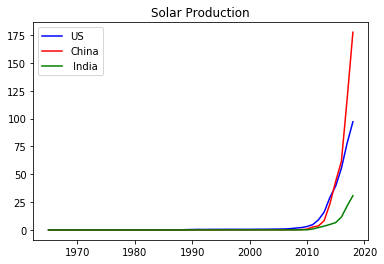

<IPython.core.display.Javascript object>

In [58]:
plt.plot(us["Year"], us["Solar (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Solar (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Solar (terawatt-hours)"], "-g", label=" India")
plt.title("Solar Production")
plt.legend(loc="upper left")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001234C3B4B48>,
      dtype=object)

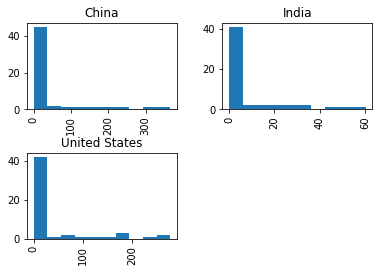

<IPython.core.display.Javascript object>

In [27]:
top_energy["Wind (terawatt-hours)"].hist(by=top_energy["Entity"])

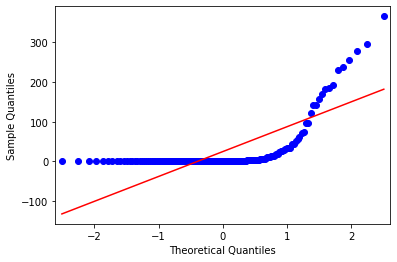

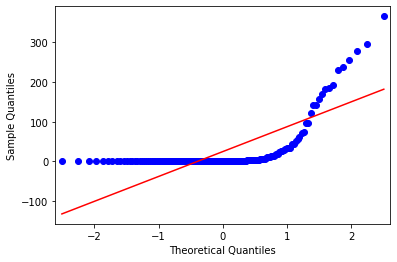

<IPython.core.display.Javascript object>

In [28]:
#should there be three qqplots?
qqplot(top_energy["Wind (terawatt-hours)"], line="s")

In [32]:
# Once again from the histograms above I noticed the data is not normalized.
# We know each of the countries are independent of eachother.
# So we stick with the Kruskal Wallice test.
t, p = stats.kruskal(
    top_energy.loc[top_energy["Entity"] == "United States", ["Wind (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "China", ["Wind (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "India", ["Wind (terawatt-hours)"]],
)
if p < 0.05:
    print("There is a significant difference. Reject the null hypothesis")
else:
    print("There is no significant difference. Cannot reject the null hypothesis")
print(p)

There is no significant difference. Cannot reject the null hypothesis
0.12251965106037972


<IPython.core.display.Javascript object>

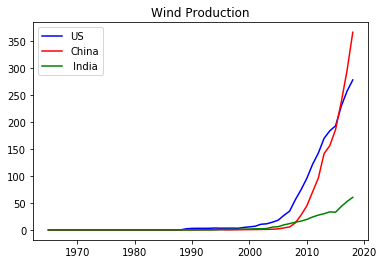

<IPython.core.display.Javascript object>

In [57]:
plt.plot(us["Year"], us["Wind (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Wind (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Wind (terawatt-hours)"], "-g", label=" India")
plt.title("Wind Production")
plt.legend(loc="upper left")